In [ ]:
Test = [-1.2599e+01, -1.6346e+01,  3.6521e+01, -1.7143e+01, -2.0666e+01,
          -3.2330e+01, -9.0652e+00, -1.6587e+01, -1.9836e+01, -2.2318e+01]

# Data Download

In [ ]:
!pip install torchinfo

In [ ]:
import torchvision.datasets

# download data

mnist_dataset = torchvision.datasets.MNIST(root='.', download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 17526188.19it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 471134.29it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4424440.36it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 10247729.30it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
!mkdir /content/MNIST/images
!mkdir /content/MNIST/valid
!mkdir /content/GAN
!mkdir /content/target

In [ ]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath

    def read_images_labels(self, images_filepath, labels_filepath):
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())

        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img

        return images, labels

    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)

In [ ]:

#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = '/content/MNIST/raw/'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte')


#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

from PIL import Image
import numpy as np

for i in range (0, len(x_train)) :
  x = np.array(x_train[i])
  img = Image.fromarray(x) # NumPy array to PIL image
  img.save(f"/content/MNIST/images/train_{i}.png", "PNG")
  if i % 10000 == 0 :
    print("Train Image Saving...", i)

for i in range (0, len(x_test)) :
  x = np.array(x_test[i])
  img = Image.fromarray(x) # NumPy array to PIL image
  img.save(f"/content/MNIST/images/test_{i}.png", "PNG")
  if i % 10000 == 0 :
    print("Test Image Saving...", i)


Train Image Saving... 0
Train Image Saving... 10000
Train Image Saving... 20000
Train Image Saving... 30000
Train Image Saving... 40000
Train Image Saving... 50000
Test Image Saving... 0


In [ ]:
# write_data.py
f = open("/content/MNIST/valid/train.txt", 'w')
f2 = open("/content/GAN/train.txt", 'w')
f3 = open("/content/target/train.txt", 'w')
f4 = open("/content/test_GAN.txt", "w")
for i in range(0, len(x_train)):
    data = f"train_{i}.png {y_train[i]}\n"
    f.write(data)
    if i <= 1000 :
      f4.write(data)
    if y_train[i] < 5 :
      f2.write(data)
    else :
      f3.write(data)
f.close()
f2.close()
f3.close()

# write_data.py
f = open("/content/MNIST/valid/test.txt", 'w')
f2 = open("/content/GAN/test.txt", 'w')
f3 = open("/content/target/test.txt", 'w')
for i in range(0, len(x_train)):
    data = f"test_{i}.png {y_train[i]}\n"
    f.write(data)
    if y_train[i] < 5 :
      f2.write(data)
    else :
      f3.write(data)
f.close()
f2.close()
f3.close()

In [ ]:
!gdown https://drive.google.com/uc?id=1bz1OseDXYAviRjrDf7T5Qxuwe6Ckf9Cu

Downloading...
From: https://drive.google.com/uc?id=1bz1OseDXYAviRjrDf7T5Qxuwe6Ckf9Cu
To: /content/MNIST.json
100% 477/477 [00:00<00:00, 2.73MB/s]


In [ ]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

# Utils

In [ ]:
import numpy as np
import torch, random, sys, json, time
import torch.nn as nn
from datetime import datetime
from torch.utils.data import sampler
import torchvision.utils as tvls

class Tee(object):
    def __init__(self, name, mode):
        self.file = open(name, mode)
        self.stdout = sys.stdout
        sys.stdout = self
    def __del__(self):
        sys.stdout = self.stdout
        self.file.close()
    def write(self, data):
        if not '...' in data:
            self.file.write(data)
        self.stdout.write(data)
        self.flush()
    def flush(self):
        self.file.flush()

def get_center_mask(img_size=64):

    mask = torch.zeros(img_size, img_size).cuda()
    scale = 0.25
    l = int(img_size * scale)
    u = int(img_size * (1.0 - scale))
    mask[l:u, l:u] = 1
    return mask

def get_input_mask(img_size, bs):
    typ = random.randint(0, 1)
    mask = torch.zeros(img_size, img_size).cuda().float()

    if typ == 0:
        scale = 0.15
        l = int(img_size * scale)
        u = int(img_size * (1.0 - scale))
        mask[l:u, l:u] = 1
    elif typ == 1:
        u, d = 10, 52
        l, r = 25, 40
        mask[l:r, u:d] = 1
        u, d = 26, 38
        l, r = 40, 63
        mask[l:r, u:d] = 1

    mask = mask.repeat(bs, 3, 1, 1)
    return mask

def load_state_dict(self, state_dict):
    own_state = self.state_dict()
    for name, param in state_dict.items():
        if name not in own_state:
            print(name)
            continue
        own_state[name].copy_(param.data)

def load_pretrain(self, state_dict):
    own_state = self.state_dict()
    for name, param in state_dict.items():
        if name.startswith("module.fc_layer"):
            continue
        if name not in own_state:
            print(name)
            continue
        own_state[name].copy_(param.data)

def load_params(self, model):
    own_state = self.state_dict()
    for name, param in model.named_parameters():
        if name not in own_state:
            print(name)
            continue
        own_state[name].copy_(param.data)

def load_json(json_file):
    with open(json_file) as data_file:
        data = json.load(data_file)
    return data

def print_params(info, params, dataset=None):
    print('-----------------------------------------------------------------')
    if dataset is not None:
        print("Dataset: %s" % dataset)
        print("Running time: %s" % datetime.now().strftime('%Y-%m-%d_%H-%M-%S'))
    for i, (key, value) in enumerate(info.items()):
        if i >=3:
            print("%s: %s" % (key, str(value)))
    for i, (key, value) in enumerate(params.items()):
        print("%s: %s" % (key, str(value)))
    print('-----------------------------------------------------------------')

def init_dataloader(args, file_path, batch_size=64, mode="gan"):
    tf = time.time()
    if args['dataset']['name'] == "celeba":
        data_set = dataloader.ImageFolder(args, file_path, mode)
    elif args['dataset']['name'] == "MNIST":
        data_set = GrayFolder(args, file_path, mode)

    data_loader = torch.utils.data.DataLoader(data_set,
                                              batch_size=batch_size,
                                              shuffle=True,
                                              num_workers=4,
                                              pin_memory=True)

    interval = time.time() - tf
    print('Initializing data loader took {:.2f}'.format(interval))
    return data_loader

def save_tensor_images(images, filename, nrow=None, normalize=True):
    if not nrow:
        tvls.save_image(images, filename, normalize = normalize, padding=0)
    else:
        tvls.save_image(images, filename, normalize = normalize, nrow=nrow, padding=0)

def load_my_state_dict(self, state_dict):
    own_state = self.state_dict()
    for name, param in state_dict.items():
        if name not in own_state:
            print(name)
            continue
        own_state[name].copy_(param.data)

# Data Uploader

In [ ]:
import os, gc, sys
import json, PIL, time, random
import torch
import math
import numpy as np
import pandas as pd
from torch.nn.modules.loss import _Loss
import torch.utils.data as data
from torchvision import transforms
import torch.nn.functional as F

class GrayFolder(data.Dataset):
    def __init__(self, args, file_path, mode):
        self.args = args
        self.mode = mode
        self.img_path = args["dataset"]["img_path"]
        self.img_list = os.listdir(self.img_path)
        self.processor = self.get_processor()
        self.name_list, self.label_list = self.get_list(file_path)
        self.image_list = self.load_img()
        self.num_img = len(self.image_list)
        self.n_classes = args["dataset"]["n_classes"]
        print("Load " + str(self.num_img) + " images")

    def get_list(self, file_path):
        name_list, label_list = [], []
        f = open(file_path, "r")
        for line in f.readlines():
            img_name, iden = line.strip().split(' ')
            name_list.append(img_name)
            label_list.append(int(iden))

        return name_list, label_list


    def load_img(self):
        img_list = []
        for i, img_name in enumerate(self.name_list):
            if img_name.endswith(".png"):
                path = self.img_path + "/" + img_name
                img = PIL.Image.open(path)
                img = img.convert('L')
                img_list.append(img)
        return img_list

    def get_processor(self):
        proc = []
        if self.args['dataset']['name'] == "MNIST":
            re_size = 32
        else:
            re_size = 64
        proc.append(transforms.Resize((re_size, re_size)))
        proc.append(transforms.ToTensor())

        return transforms.Compose(proc)

    def __getitem__(self, index):
        processer = self.get_processor()
        img = processer(self.image_list[index])
        if self.mode == "gan":
            return img
        label = self.label_list[index]
        return img, label

    def __len__(self):
        return self.num_img

# Discriminator

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DGWGAN32(nn.Module):
    def __init__(self, in_dim=1, dim=64):
        super(DGWGAN32, self).__init__()
        def conv_ln_lrelu(in_dim, out_dim):
            return nn.Sequential(
                nn.Conv2d(in_dim, out_dim, 5, 2, 2),
                # Since there is no effective implementation of LayerNorm,
                # we use InstanceNorm2d instead of LayerNorm here.
                nn.InstanceNorm2d(out_dim, affine=True),
                nn.LeakyReLU(0.2))

        self.layer1 = nn.Sequential(nn.Conv2d(in_dim, dim, 5, 2, 2), nn.LeakyReLU(0.2))
        self.layer2 = conv_ln_lrelu(dim, dim * 2)
        self.layer3 = conv_ln_lrelu(dim * 2, dim * 4)
        self.layer4 = nn.Conv2d(dim * 4, 1, 4)

    def forward(self, x):
        feat1 = self.layer1(x)
        feat2 = self.layer2(feat1)
        feat3 = self.layer3(feat2)
        y = self.layer4(feat3)
        y = y.view(-1)
        return y

In [ ]:
from torchvision import models
from torchinfo import summary


D = DGWGAN32()
summary(D, (4, 1, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
DGWGAN32                                 [4]                       --
├─Sequential: 1-1                        [4, 64, 16, 16]           --
│    └─Conv2d: 2-1                       [4, 64, 16, 16]           1,664
│    └─LeakyReLU: 2-2                    [4, 64, 16, 16]           --
├─Sequential: 1-2                        [4, 128, 8, 8]            --
│    └─Conv2d: 2-3                       [4, 128, 8, 8]            204,928
│    └─InstanceNorm2d: 2-4               [4, 128, 8, 8]            256
│    └─LeakyReLU: 2-5                    [4, 128, 8, 8]            --
├─Sequential: 1-3                        [4, 256, 4, 4]            --
│    └─Conv2d: 2-6                       [4, 256, 4, 4]            819,456
│    └─InstanceNorm2d: 2-7               [4, 256, 4, 4]            512
│    └─LeakyReLU: 2-8                    [4, 256, 4, 4]            --
├─Conv2d: 1-4                            [4, 1, 1, 1]              4,0

# Generator

In [ ]:
import torch
import torch.nn as nn

class GeneratorMNIST(nn.Module):
    def __init__(self, in_dim=100, dim=64):
        super(GeneratorMNIST, self).__init__()
        def dconv_bn_relu(in_dim, out_dim):
            return nn.Sequential(
                nn.ConvTranspose2d(in_dim, out_dim, 5, 2,
                                   padding=2, output_padding=1, bias=False),
                nn.BatchNorm2d(out_dim),
                nn.ReLU())

        self.l1 = nn.Sequential(
            nn.Linear(in_dim, dim * 4 * 4 * 4, bias=False),
            nn.BatchNorm1d(dim * 4 * 4 * 4),
            nn.ReLU())
        self.l2_5 = nn.Sequential(
            dconv_bn_relu(dim * 4, dim * 2),
            dconv_bn_relu(dim * 2, dim),
            nn.ConvTranspose2d(dim, 1, 5, 2, padding=2, output_padding=1),
            nn.Sigmoid())

    def forward(self, x):
        y = self.l1(x)
        y = y.view(y.size(0), -1, 4, 4)
        y = self.l2_5(y)
        return y



In [ ]:
from torchvision import models
from torchinfo import summary


G = GeneratorMNIST(100)
summary(G, (4, 100))

Layer (type:depth-idx)                   Output Shape              Param #
GeneratorMNIST                           [4, 1, 32, 32]            --
├─Sequential: 1-1                        [4, 4096]                 --
│    └─Linear: 2-1                       [4, 4096]                 409,600
│    └─BatchNorm1d: 2-2                  [4, 4096]                 8,192
│    └─ReLU: 2-3                         [4, 4096]                 --
├─Sequential: 1-2                        [4, 1, 32, 32]            --
│    └─Sequential: 2-4                   [4, 128, 8, 8]            --
│    │    └─ConvTranspose2d: 3-1         [4, 128, 8, 8]            819,200
│    │    └─BatchNorm2d: 3-2             [4, 128, 8, 8]            256
│    │    └─ReLU: 3-3                    [4, 128, 8, 8]            --
│    └─Sequential: 2-5                   [4, 64, 16, 16]           --
│    │    └─ConvTranspose2d: 3-4         [4, 64, 16, 16]           204,800
│    │    └─BatchNorm2d: 3-5             [4, 64, 16, 16]          

# Classifier

In [ ]:
# -*- coding: utf-8 -*-
import time
import torch
import numpy as np
import torch.nn as nn
import torchvision.models
import torch.nn.functional as F
from torch.nn.modules.loss import _Loss
import math

class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)


class SCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(SCNN, self).__init__()
        self.feat_dim = 512
        self.num_classes = num_classes
        self.feature = nn.Sequential(
            nn.Conv2d(1, 32, 7, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.2),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, 5, stride=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, 5, stride=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            nn.Conv2d(128, 256, 3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2),
            nn.Conv2d(256, 512, 3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2))

        self.fc_layer = nn.Linear(self.feat_dim, self.num_classes)

    def forward(self, x):
        feature = self.feature(x)
        feature = feature.view(feature.size(0), -1)
        out = self.fc_layer(feature)
        return [feature, out]



In [ ]:
from torchvision import models
from torchinfo import summary


S = SCNN()
summary(S, (32, 1, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
SCNN                                     [32, 512]                 --
├─Sequential: 1-1                        [32, 512, 1, 1]           --
│    └─Conv2d: 2-1                       [32, 32, 28, 28]          1,600
│    └─BatchNorm2d: 2-2                  [32, 32, 28, 28]          64
│    └─LeakyReLU: 2-3                    [32, 32, 28, 28]          --
│    └─MaxPool2d: 2-4                    [32, 32, 14, 14]          --
│    └─Conv2d: 2-5                       [32, 64, 10, 10]          51,264
│    └─BatchNorm2d: 2-6                  [32, 64, 10, 10]          128
│    └─LeakyReLU: 2-7                    [32, 64, 10, 10]          --
│    └─MaxPool2d: 2-8                    [32, 64, 5, 5]            --
│    └─Conv2d: 2-9                       [32, 128, 1, 1]           204,928
│    └─BatchNorm2d: 2-10                 [32, 128, 1, 1]           256
│    └─LeakyReLU: 2-11                   [32, 128, 1, 1]           --
│

# Train Classifier (SCNN)

In [ ]:
file = "/content/MNIST.json"
model_name = 'GAN'

args = load_json(json_file=file)
file_path = '/content/MNIST/valid/train.txt'
batch_size = args[model_name]['batch_size']

dataloader = init_dataloader(args, file_path, batch_size, mode="CNN")

Target = SCNN()

Target.cuda()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(Target.parameters(), lr=0.001)

Load 60000 images
Initializing data loader took 5.36


In [ ]:
epochs = 100
step = 0

In [ ]:
for epoch in range(epochs):
    start = time.time()
    total_loss = 0

    for i, imgs in enumerate(dataloader):
        #xb, yb = torch.autograd.Variable(xb), torch.autograd.Variable(yb)
        step += 1

        pred = [Target(imgs[0].cuda())[-1]]
        loss = criterion(pred[0].cuda(), imgs[1].cuda())

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        total_loss += loss.item()

        if step % 10000 == 0 :
          print("Learning...", step)

    torch.save({'state_dict':Target.state_dict()}, os.path.join('/content/target/', "SCNN.tar"))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Learning... 10000
Learning... 20000
Learning... 30000
Learning... 40000
Learning... 50000
Learning... 60000
Learning... 70000
Learning... 80000
Learning... 90000


# Test classifier (SCNN)

In [ ]:
#Target(imgs[0].cuda())

In [ ]:
args = load_json(json_file=file)
file_path = '/content/MNIST/valid/train.txt'
batch_size = args[model_name]['batch_size']

dataloader = init_dataloader(args, file_path, batch_size, mode="CNN")

for i, imgs in enumerate(dataloader):
  pass
Target(imgs[0].cuda())[1].size()

torch.Size([32, 10])

In [ ]:
imgs[0].cuda().size()

torch.Size([32, 1, 32, 32])

In [ ]:
imgs[1].cuda()

tensor([9, 7, 1, 4, 6, 0, 8, 4, 8, 6, 0, 4, 9, 5, 2, 5, 7, 6, 9, 8, 4, 6, 7, 4,
        7, 0, 0, 0, 1, 0, 0, 3], device='cuda:0')

In [ ]:
  !mkdir /content/result

In [ ]:
save_img_dir = '/content/result'
save_tensor_images(imgs[0].cuda().detach(), os.path.join(save_img_dir, "result_image_ClassifierInput.png"), nrow = 8)


In [ ]:
pred_data = Target(imgs[0].cuda())[-1]
pred_label = []
for L in pred_data :
  L = L.tolist()
  pred_label.append(L.index(max(L)))
pred_label

[9,
 7,
 1,
 4,
 6,
 0,
 8,
 4,
 8,
 6,
 0,
 4,
 9,
 5,
 2,
 5,
 7,
 6,
 9,
 8,
 4,
 6,
 7,
 4,
 7,
 0,
 0,
 0,
 1,
 0,
 0,
 3]

# Train GAN

In [ ]:
import os
import time
import torch
import torchvision
from torch.nn import BCELoss
from torch.autograd import grad
import torchvision.utils as tvls
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import sys
import math
import scipy

def freeze(net):
    for p in net.parameters():
        p.requires_grad_(False)

def unfreeze(net):
    for p in net.parameters():
        p.requires_grad_(True)

def gradient_penalty(x, y):
    # interpolation
    shape = [x.size(0)] + [1] * (x.dim() - 1)
    alpha = torch.rand(shape).cuda()
    z = x + alpha * (y - x)
    z = z.cuda()
    z.requires_grad = True

    o = DG(z)
    g = grad(o, z, grad_outputs = torch.ones(o.size()).cuda(), create_graph = True)[0].view(z.size(0), -1)
    gp = ((g.norm(p = 2, dim = 1) - 1) ** 2).mean()

    return gp

root_path = "./Attack"
log_path = os.path.join(root_path, "attack_logs")
save_img_dir = os.path.join(root_path, "attack_imgs")
save_model_dir= os.path.join(root_path, "attack_models")
os.makedirs(save_model_dir, exist_ok=True)
os.makedirs(save_img_dir, exist_ok=True)
os.makedirs(log_path, exist_ok=True)

dataset_name = "MNIST"

log_file = "GAN.txt"
Tee(os.path.join(log_path, log_file), 'w')

if __name__ == "__main__":

    file = "/content/MNIST.json"
    args = load_json(json_file=file)

    file_path = '/content/test_GAN.txt'
    model_name = 'GAN'
    lr = args[model_name]['lr']
    batch_size = args[model_name]['batch_size']
    z_dim = args[model_name]['z_dim']
    epochs = args[model_name]['epochs']
    n_critic = args[model_name]['n_critic']

    print("---------------------Training [%s]------------------------------" % model_name)
    print_params(args["dataset"], args[model_name])

    dataloader = init_dataloader(args, file_path, batch_size, mode="cnn_gan")

    G = GeneratorMNIST(z_dim)
    DG = DGWGAN32()

    G = torch.nn.DataParallel(G).cuda()
    DG = torch.nn.DataParallel(DG).cuda()

    e_path = "/content/target/SCNN.tar"
    E = SCNN(10)
    E = nn.DataParallel(E).cuda()
    ckp_E = torch.load(e_path)['state_dict']
    load_my_state_dict(E, ckp_E)

    dg_optimizer = torch.optim.Adam(DG.parameters(), lr=lr, betas=(0.5, 0.999))
    g_optimizer = torch.optim.Adam(G.parameters(), lr=lr, betas=(0.5, 0.999))

    step = 0
    epochs = 1000

    for epoch in range(epochs):
        start = time.time()
        criterion = nn.CrossEntropyLoss().cuda()
        freeze(E)
        for i, images in enumerate(dataloader):
            step += 1
            imgs = images[0].cuda()
            bs = imgs.size(0)

            step += 1
            imgs = imgs.cuda()
            bs = imgs.size(0)

            freeze(G)
            unfreeze(DG)

            z = torch.randn(bs, z_dim).cuda()
            f_imgs = G(z)

            r_logit = DG(imgs)
            f_logit = DG(f_imgs)

            f_D = E(f_imgs)[-1]
            # f_D = f_D.mul(f_D) * epoch * 100
            r_D = E(imgs)[-1]
            # r_D = r_D.mul(r_D) * epoch * 100

            r_sorted_D = r_D.sort()[0]
            f_sorted_D = f_D.sort()[0]

            all_values = torch.cat([r_sorted_D, f_sorted_D], dim=1)
            all_values.sort()

            deltas = torch.diff(all_values)

            f_cdf_indices = torch.searchsorted(f_sorted_D , all_values[:, :-1], right=True)/ f_D.size()[-1]
            r_cdf_indices = torch.searchsorted(r_sorted_D , all_values[:, :-1], right=True)/ r_D.size()[-1]

            wd_E = torch.sum(deltas.mul(torch.abs(f_cdf_indices - r_cdf_indices)))

            # for i in range (64) :
              # wd_E = scipy.stats.wasserstein_distance(r_D, f_D)
            # wd_E = torch.log(r_D).mean() - torch.log(f_D).mean()

            wd = r_logit.mean() - f_logit.mean() # Wasserstein-1 Distance
            gp = gradient_penalty(imgs.data, f_imgs.data)
            dg_loss = - ( wd + wd_E ) / 2 + gp * 10.0

            dg_optimizer.zero_grad()
            dg_loss.backward()
            dg_optimizer.step()

            # train G

            if step % n_critic == 0:
                freeze(DG)
                unfreeze(G)
                z = torch.randn(bs, z_dim).cuda()
                f_imgs = G(z)

                logit_dg = DG(f_imgs)

                # calculate g_loss
                g_loss = - logit_dg.mean()


                g_optimizer.zero_grad()
                g_loss.backward()
                g_optimizer.step()

        end = time.time()
        interval = end - start
        if epoch % 10 == 0 :
          print("Epoch:%d \t Time:%.2f \t\t wd:%.2f \t wd_E:%.2f" % (epoch, interval, wd, wd_E))
        if (epoch+1) % 100 == 0:
            z = torch.randn(32, z_dim).cuda()
            fake_image = G(z)
            save_tensor_images(fake_image.detach(), os.path.join(save_img_dir, "result_image_O_GAN_{}.png".format(epoch)), nrow = 8)

        torch.save({'state_dict':G.state_dict()}, os.path.join(save_model_dir, "MNIST_G.tar"))
        torch.save({'state_dict':DG.state_dict()}, os.path.join(save_model_dir, "MNIST_D.tar"))


---------------------Training [GAN]------------------------------
-----------------------------------------------------------------
train_file_path: /content/MNIST/valid/train/train.txt
test_file_path: /content/MNIST/valid/test/test.txt
img_type: gray
img_size: 28
model_name: GAN
n_classes: 10
gpus: 0
epochs: 100
batch_size: 64
lr: 0.0002
z_dim: 100
n_critic: 5
weight_decay: 0.0001
-----------------------------------------------------------------
Load 518 images
Initializing data loader took 0.08
feature.0.weight
feature.0.bias
feature.1.weight
feature.1.bias
feature.1.running_mean
feature.1.running_var
feature.1.num_batches_tracked
feature.4.weight
feature.4.bias
feature.5.weight
feature.5.bias
feature.5.running_mean
feature.5.running_var
feature.5.num_batches_tracked
feature.8.weight
feature.8.bias
feature.9.weight
feature.9.bias
feature.9.running_mean
feature.9.running_var
feature.9.num_batches_tracked
feature.11.weight
feature.11.bias
feature.12.weight
feature.12.bias
feature.12.ru

<ipython-input-21-41f5e5752b56>:120: UserWarning: torch.searchsorted(): input value tensor is non-contiguous, this will lower the performance due to extra data copy when converting non-contiguous tensor to contiguous, please use contiguous input value tensor if possible. This message will only appear once per program. (Triggered internally at ../aten/src/ATen/native/BucketizationUtils.h:32.)
  f_cdf_indices = torch.searchsorted(f_sorted_D , all_values[:, :-1], right=True)/ f_D.size()[-1]


Epoch:0 	 Time:2.12 		 wd:5.05 	 wd_E:1.75
Epoch:10 	 Time:0.33 		 wd:6.61 	 wd_E:1.83
Epoch:20 	 Time:0.33 		 wd:6.61 	 wd_E:0.82
Epoch:30 	 Time:0.33 		 wd:4.67 	 wd_E:1.36
Epoch:40 	 Time:0.33 		 wd:3.97 	 wd_E:1.64
Epoch:50 	 Time:0.33 		 wd:4.07 	 wd_E:2.01
Epoch:60 	 Time:0.34 		 wd:3.64 	 wd_E:2.56
Epoch:70 	 Time:0.33 		 wd:3.77 	 wd_E:1.17
Epoch:80 	 Time:0.35 		 wd:3.09 	 wd_E:1.39
Epoch:90 	 Time:0.34 		 wd:4.32 	 wd_E:1.07
Epoch:100 	 Time:0.32 		 wd:4.41 	 wd_E:1.80
Epoch:110 	 Time:0.33 		 wd:3.07 	 wd_E:2.02
Epoch:120 	 Time:0.34 		 wd:4.46 	 wd_E:1.83
Epoch:130 	 Time:0.32 		 wd:3.59 	 wd_E:1.41
Epoch:140 	 Time:0.33 		 wd:3.72 	 wd_E:1.01
Epoch:150 	 Time:0.34 		 wd:3.78 	 wd_E:1.19
Epoch:160 	 Time:0.33 		 wd:3.93 	 wd_E:2.05
Epoch:170 	 Time:0.32 		 wd:5.25 	 wd_E:1.52
Epoch:180 	 Time:0.33 		 wd:3.32 	 wd_E:1.91
Epoch:190 	 Time:0.34 		 wd:4.52 	 wd_E:2.77
Epoch:200 	 Time:0.34 		 wd:4.07 	 wd_E:1.74
Epoch:210 	 Time:0.33 		 wd:3.25 	 wd_E:2.35
Epoch:220 	 Time:0.35

In [ ]:
r_D.size()[-1]

10

In [ ]:
torch.cat([r_sorted_D, f_sorted_D], dim=1).size()

torch.Size([6, 20])

In [ ]:
f_sorted_D.size()

torch.Size([6, 10])

In [ ]:
f_logit.mean()

tensor(-1.6507, device='cuda:0', grad_fn=<MeanBackward0>)

In [ ]:
r_logit.mean()

tensor(2.8765, device='cuda:0', grad_fn=<MeanBackward0>)

In [ ]:
len(r_D.tolist())

6

In [ ]:
torch.abs(f_cdf_indices - r_cdf_indices).size()

torch.Size([6, 19])

In [ ]:
deltas.size()

torch.Size([6, 19])

In [ ]:
all_values[:-1]

tensor([[-0.5028, -0.4735, -0.4681, -0.1509, -0.0474,  0.0676,  0.1639,  0.3624,
          0.5367,  0.6714, -0.4634, -0.1256,  0.1213,  0.1258,  0.1311,  0.1749,
          0.2260,  0.3611,  0.5265,  0.6853],
        [-0.5502, -0.3783, -0.3078,  0.0870,  0.2615,  0.2960,  0.3140,  0.3357,
          0.5382,  0.5730, -0.9853, -0.5250, -0.3759, -0.2901, -0.2589, -0.1178,
         -0.0754,  0.1683,  0.2240,  0.6101],
        [-1.0204, -0.6535, -0.4043, -0.3247, -0.3206, -0.2418,  0.0349,  0.0628,
          0.3958,  1.1552, -0.5290, -0.1226, -0.0682, -0.0408, -0.0108,  0.2269,
          0.2683,  0.3089,  0.4772,  0.7933],
        [-0.4652, -0.4372, -0.0897, -0.0764, -0.0639,  0.1516,  0.2409,  0.2894,
          0.3680,  0.5403, -0.7899, -0.4348, -0.2676, -0.0872,  0.1645,  0.2080,
          0.3065,  0.3809,  0.6257,  0.7079],
        [-0.8290, -0.7862, -0.1134, -0.1125,  0.0657,  0.1237,  0.1543,  0.1600,
          0.5817,  0.6725, -0.4552, -0.4446, -0.3869, -0.3633, -0.1935, -0.0858,
      

In [ ]:
wd, wd_E

(tensor(4.5272, device='cuda:0', grad_fn=<SubBackward0>),
 tensor(2.0394, device='cuda:0'))

# Test GAN

In [ ]:
args = load_json(json_file=file)
file_path = '/content/GAN/train.txt'
batch_size = args[model_name]['batch_size']

output = G.forward(torch.randn(bs, z_dim).cuda())
dataloader = init_dataloader(args, file_path, batch_size, mode="CNN")
img = output.detach().cpu().numpy()
x = np.array(img) # PIL image to NumPy array

In [ ]:
imgs[1]

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]], device='cuda:0')

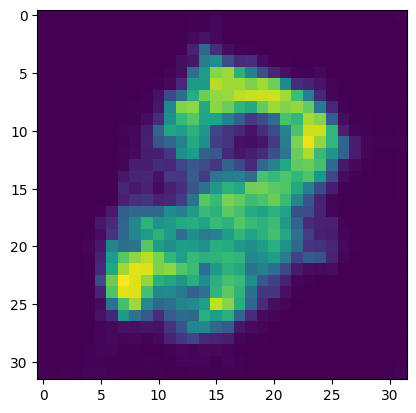

In [ ]:
plt.imshow(x[0][0])

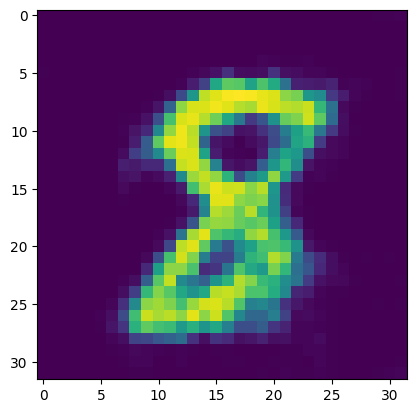

In [ ]:
plt.imshow(x[1][0])

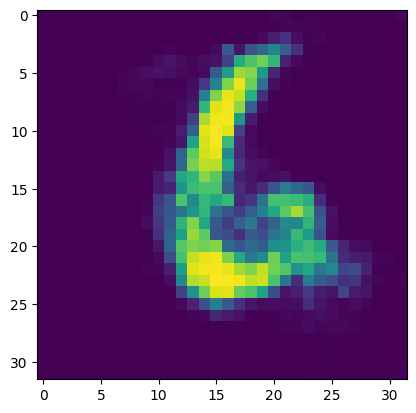

In [ ]:
plt.imshow(x[2][0])

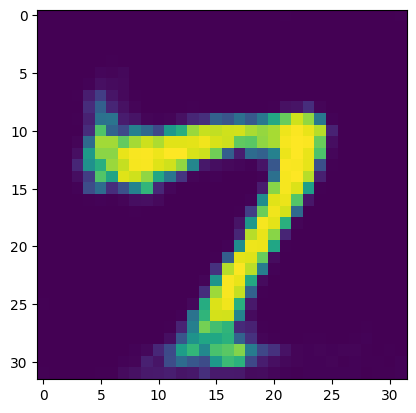

In [ ]:
plt.imshow(x[3][0])

In [ ]:
DG.forward(output)

tensor([-2.5140, -1.5463, -1.6572, -1.8862, -3.5026, -2.2300], device='cuda:0',
       grad_fn=<ViewBackward0>)

# No MNIST

In [ ]:
import os
import time
import torch
import torchvision
from torch.nn import BCELoss
from torch.autograd import grad
import torchvision.utils as tvls
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import sys

def freeze(net):
    for p in net.parameters():
        p.requires_grad_(False)

def unfreeze(net):
    for p in net.parameters():
        p.requires_grad_(True)

def gradient_penalty(x, y):
    # interpolation
    shape = [x.size(0)] + [1] * (x.dim() - 1)
    alpha = torch.rand(shape).cuda()
    z = x + alpha * (y - x)
    z = z.cuda()
    z.requires_grad = True

    o = DG(z)
    g = grad(o, z, grad_outputs = torch.ones(o.size()).cuda(), create_graph = True)[0].view(z.size(0), -1)
    gp = ((g.norm(p = 2, dim = 1) - 1) ** 2).mean()

    return gp

root_path = "./Attack"
log_path = os.path.join(root_path, "attack_logs")
save_img_dir = os.path.join(root_path, "attack_imgs")
save_model_dir= os.path.join(root_path, "attack_models")
os.makedirs(save_model_dir, exist_ok=True)
os.makedirs(save_img_dir, exist_ok=True)
os.makedirs(log_path, exist_ok=True)

dataset_name = "MNIST"

log_file = "GAN.txt"
Tee(os.path.join(log_path, log_file), 'w')

if __name__ == "__main__":

    file = "/content/MNIST.json"
    args = load_json(json_file=file)

    file_path = '/content/test_GAN.txt'
    model_name = 'GAN'
    lr = args[model_name]['lr']
    batch_size = args[model_name]['batch_size']
    z_dim = args[model_name]['z_dim']
    epochs = args[model_name]['epochs']
    n_critic = args[model_name]['n_critic']

    print("---------------------Training [%s]------------------------------" % model_name)
    print_params(args["dataset"], args[model_name])

    dataloader = init_dataloader(args, file_path, batch_size, mode="cnn_gan")

    G = GeneratorMNIST(z_dim)
    DG = DGWGAN32()

    G = torch.nn.DataParallel(G).cuda()
    DG = torch.nn.DataParallel(DG).cuda()

    e_path = "/content/target/SCNN.tar"
    E = SCNN(10)
    E = nn.DataParallel(E).cuda()
    ckp_E = torch.load(e_path)['state_dict']
    load_my_state_dict(E, ckp_E)

    dg_optimizer = torch.optim.Adam(DG.parameters(), lr=lr, betas=(0.5, 0.999))
    g_optimizer = torch.optim.Adam(G.parameters(), lr=lr, betas=(0.5, 0.999))

    step = 0

    epochs = 1000
    for epoch in range(epochs):
        start = time.time()
        criterion = nn.CrossEntropyLoss().cuda()
        freeze(E)
        for i, images in enumerate(dataloader):
            step += 1
            imgs = images[0].cuda()
            bs = imgs.size(0)

            step += 1
            imgs = imgs.cuda()
            bs = imgs.size(0)

            freeze(G)
            unfreeze(DG)

            z = torch.randn(bs, z_dim).cuda()
            f_imgs = G(z)

            r_logit = DG(imgs)
            f_logit = DG(f_imgs)
            D = E(f_imgs)[-1]
            D = D.mul(D) * (epoch/100000)

            wd = r_logit.mean() - f_logit.mean()  # Wasserstein-1 Distance
            gp = gradient_penalty(imgs.data, f_imgs.data)
            dg_loss = - wd + gp * 10.0

            dg_optimizer.zero_grad()
            dg_loss.backward()
            dg_optimizer.step()

            # train G

            if step % n_critic == 0:
                freeze(DG)
                unfreeze(G)
                z = torch.randn(bs, z_dim).cuda()
                f_imgs = G(z)

                logit_dg = DG(f_imgs)

                # calculate g_loss
                g_loss = - logit_dg.mean()


                g_optimizer.zero_grad()
                g_loss.backward()
                g_optimizer.step()

        end = time.time()
        interval = end - start
        if epoch % 10 == 0 :
          print("Epoch:%d \t Time:%.2f" % (epoch, interval))
        if (epoch+1) % 100 == 0:
            z = torch.randn(32, z_dim).cuda()
            fake_image = G(z)
            save_tensor_images(fake_image.detach(), os.path.join(save_img_dir, "result_image_N_GAN_{}.png".format(epoch)), nrow = 8)

        torch.save({'state_dict':G.state_dict()}, os.path.join(save_model_dir, "MNIST_G2.tar"))
        torch.save({'state_dict':DG.state_dict()}, os.path.join(save_model_dir, "MNIST_D2.tar"))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [ ]:
args = load_json(json_file=file)
file_path = '/content/GAN/train.txt'
batch_size = args[model_name]['batch_size']

e_path = "/content/Attack/attack_models/MNIST_G2.tar"
G = GeneratorMNIST(z_dim)
G = nn.DataParallel(G).cuda()
ckp_G = torch.load(e_path)['state_dict']
load_my_state_dict(G, ckp_G)

output = G.forward(torch.randn(bs, z_dim).cuda())
dataloader = init_dataloader(args, file_path, batch_size, mode="CNN")
img = output.detach().cpu().numpy()
x = np.array(img) # PIL image to NumPy array


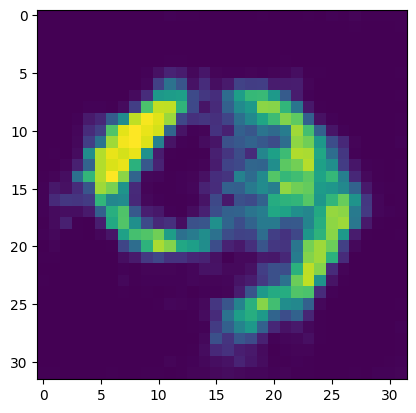

In [ ]:
plt.imshow(x[0][0])
plt.imsave('./Attack/d_0.png', x[0][0])

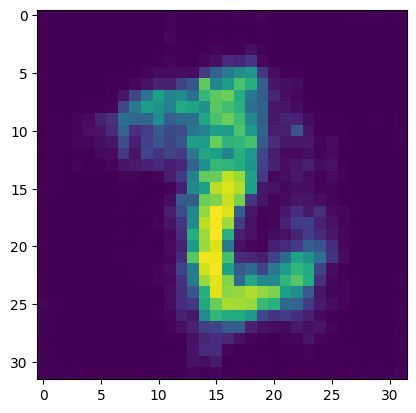

In [ ]:
plt.imshow(x[1][0])
plt.imsave('./Attack/d_1.png', x[1][0])

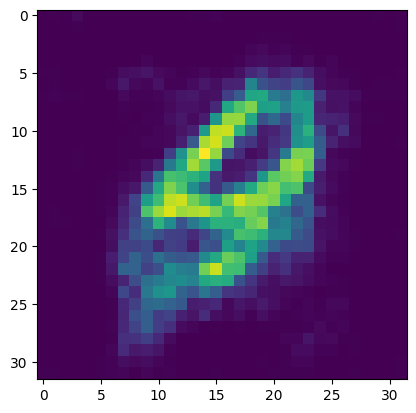

In [ ]:
plt.imshow(x[2][0])
plt.imsave('./Attack/d_2.png', x[2][0])

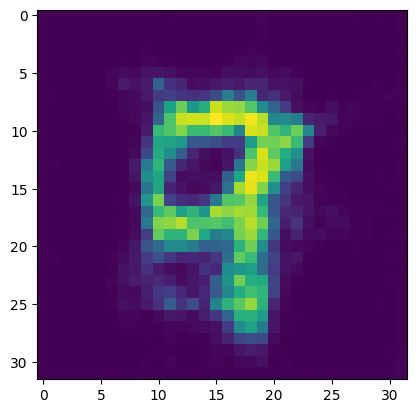

In [ ]:
plt.imshow(x[3][0])
plt.imsave('./Attack/d_3.png', x[3][0])

# R 반대로해보기

In [ ]:
import os
import time
import torch
import torchvision
from torch.nn import BCELoss
from torch.autograd import grad
import torchvision.utils as tvls
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import sys
import math
import scipy

def freeze(net):
    for p in net.parameters():
        p.requires_grad_(False)

def unfreeze(net):
    for p in net.parameters():
        p.requires_grad_(True)

def gradient_penalty(x, y):
    # interpolation
    shape = [x.size(0)] + [1] * (x.dim() - 1)
    alpha = torch.rand(shape).cuda()
    z = x + alpha * (y - x)
    z = z.cuda()
    z.requires_grad = True

    o = DG(z)
    g = grad(o, z, grad_outputs = torch.ones(o.size()).cuda(), create_graph = True)[0].view(z.size(0), -1)
    gp = ((g.norm(p = 2, dim = 1) - 1) ** 2).mean()

    return gp

root_path = "./Attack"
log_path = os.path.join(root_path, "attack_logs")
save_img_dir = os.path.join(root_path, "attack_imgs")
save_model_dir= os.path.join(root_path, "attack_models")
os.makedirs(save_model_dir, exist_ok=True)
os.makedirs(save_img_dir, exist_ok=True)
os.makedirs(log_path, exist_ok=True)

dataset_name = "MNIST"

log_file = "GAN.txt"
Tee(os.path.join(log_path, log_file), 'w')

if __name__ == "__main__":

    file = "/content/MNIST.json"
    args = load_json(json_file=file)

    file_path = '/content/test_GAN.txt'
    model_name = 'GAN'
    lr = args[model_name]['lr']
    batch_size = args[model_name]['batch_size']
    z_dim = args[model_name]['z_dim']
    epochs = args[model_name]['epochs']
    n_critic = args[model_name]['n_critic']

    print("---------------------Training [%s]------------------------------" % model_name)
    print_params(args["dataset"], args[model_name])

    dataloader = init_dataloader(args, file_path, batch_size, mode="cnn_gan")

    G = GeneratorMNIST(z_dim)
    DG = DGWGAN32()

    G = torch.nn.DataParallel(G).cuda()
    DG = torch.nn.DataParallel(DG).cuda()

    e_path = "/content/target/SCNN.tar"
    E = SCNN(10)
    E = nn.DataParallel(E).cuda()
    ckp_E = torch.load(e_path)['state_dict']
    load_my_state_dict(E, ckp_E)

    dg_optimizer = torch.optim.Adam(DG.parameters(), lr=lr, betas=(0.5, 0.999))
    g_optimizer = torch.optim.Adam(G.parameters(), lr=lr, betas=(0.5, 0.999))

    step = 0
    epochs = 1000

    for epoch in range(epochs):
        start = time.time()
        criterion = nn.CrossEntropyLoss().cuda()
        freeze(E)
        for i, images in enumerate(dataloader):
            step += 1
            imgs = images[0].cuda()
            bs = imgs.size(0)

            step += 1
            imgs = imgs.cuda()
            bs = imgs.size(0)

            freeze(G)
            unfreeze(DG)

            z = torch.randn(bs, z_dim).cuda()
            f_imgs = G(z)

            r_logit = DG(imgs)
            f_logit = DG(f_imgs)

            f_D = E(f_imgs)[-1]
            # f_D = f_D.mul(f_D) * epoch * 100
            r_D = E(imgs)[-1]
            # r_D = r_D.mul(r_D) * epoch * 100

            r_sorted_D = r_D.sort()[0]
            f_sorted_D = f_D.sort()[0]

            all_values = torch.cat([r_sorted_D, f_sorted_D], dim=1)
            all_values.sort()

            deltas = torch.diff(all_values)

            f_cdf_indices = torch.searchsorted(f_sorted_D , all_values[:, :-1], right=True)/ f_D.size()[-1]
            r_cdf_indices = torch.searchsorted(r_sorted_D , all_values[:, :-1], right=True)/ r_D.size()[-1]

            wd_E = torch.sum(deltas.mul(torch.abs(r_cdf_indices - f_cdf_indices)))

            # for i in range (64) :
              # wd_E = scipy.stats.wasserstein_distance(r_D, f_D)
            # wd_E = torch.log(r_D).mean() - torch.log(f_D).mean()

            wd = r_logit.mean() - f_logit.mean() # Wasserstein-1 Distance
            gp = gradient_penalty(imgs.data, f_imgs.data)
            dg_loss = - ( wd + wd_E ) / 2 + gp * 10.0

            dg_optimizer.zero_grad()
            dg_loss.backward()
            dg_optimizer.step()

            # train G

            if step % n_critic == 0:
                freeze(DG)
                unfreeze(G)
                z = torch.randn(bs, z_dim).cuda()
                f_imgs = G(z)

                logit_dg = DG(f_imgs)

                # calculate g_loss
                g_loss = - logit_dg.mean()


                g_optimizer.zero_grad()
                g_loss.backward()
                g_optimizer.step()

        end = time.time()
        interval = end - start
        if epoch % 10 == 0 :
          print("Epoch:%d \t Time:%.2f \t\t wd:%.2f \t wd_E:%.2f" % (epoch, interval, wd, wd_E))
        if (epoch+1) % 100 == 0:
            z = torch.randn(32, z_dim).cuda()
            fake_image = G(z)
            save_tensor_images(fake_image.detach(), os.path.join(save_img_dir, "result_image_o_{}.png".format(epoch)), nrow = 8)

        torch.save({'state_dict':G.state_dict()}, os.path.join(save_model_dir, "MNIST_G.tar"))
        torch.save({'state_dict':DG.state_dict()}, os.path.join(save_model_dir, "MNIST_D.tar"))


In [ ]:
args = load_json(json_file=file)
file_path = '/content/GAN/train.txt'
batch_size = args[model_name]['batch_size']

output = G.forward(torch.randn(bs, z_dim).cuda())
dataloader = init_dataloader(args, file_path, batch_size, mode="CNN")
img = output.detach().cpu().numpy()
x = np.array(img) # PIL image to NumPy array

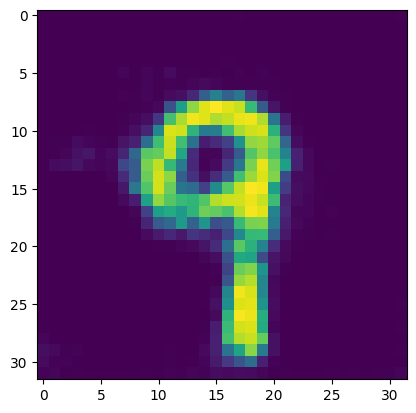

In [ ]:
plt.imshow(x[0][0])
plt.imsave('./Attack/o_0.png', x[0][0])

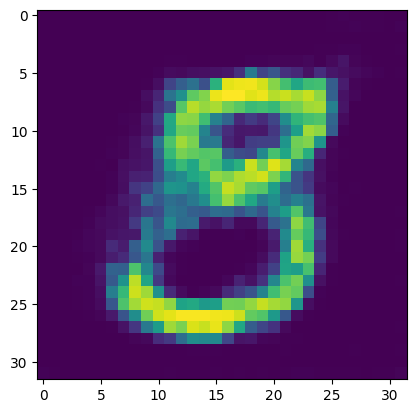

In [ ]:
plt.imshow(x[1][0])
plt.imsave('./Attack/o_1.png', x[1][0])

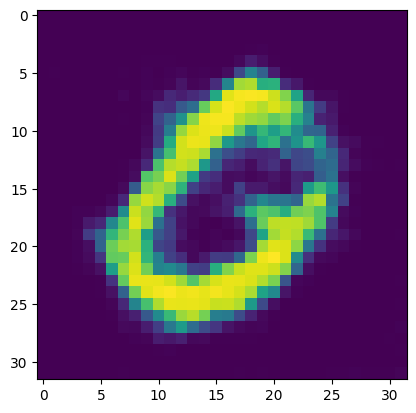

In [ ]:
plt.imshow(x[2][0])
plt.imsave('./Attack/o_2.png', x[2][0])

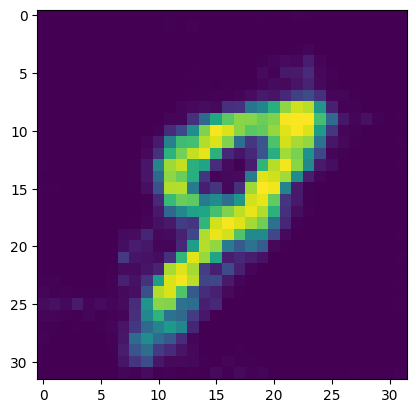

In [ ]:
plt.imshow(x[3][0])
plt.imsave('./Attack/o_3.png', x[3][0])

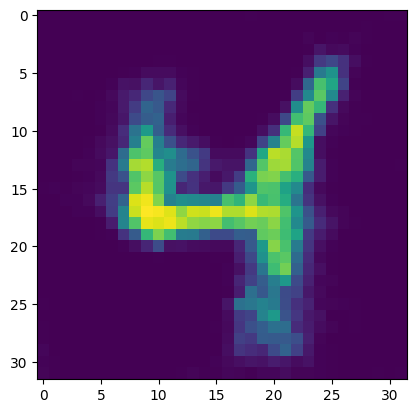

In [ ]:
plt.imshow(x[0][0])

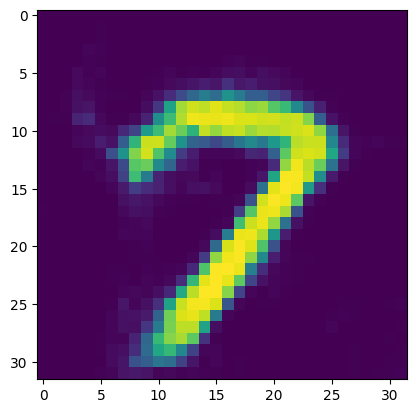

In [ ]:
plt.imshow(x[1][0])

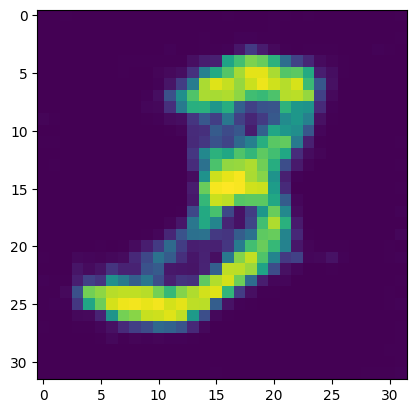

In [ ]:
plt.imshow(x[2][0])

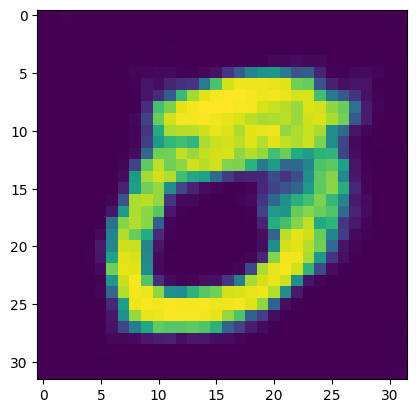

In [ ]:
plt.imshow(x[3][0])

# Cos 유사도 측정하기

In [ ]:
def mini_img(img_path, resize_shape=(10, 10)) :
     img = Image.open(img_path).convert("RGB")
     img = img.resize(resize_shape)
     return img

In [ ]:
def cosine_similarity(img1, img2):
    array1 = np.array(img1)
    array2 = np.array(img2)
    assert array1.shape == array2.shape

    h, w, c = array1.shape
    len_vec = h * w * c
    vector_1 = array1.reshape(len_vec,) / 255.
    vector_2 = array2.reshape(len_vec,) / 255.

    cosine_similarity = np.dot(vector_1, vector_2) / (np.linalg.norm(vector_1) * np.linalg.norm(vector_2))
    return cosine_similarity

In [ ]:
file_path = '/content/MNIST/'
name_list, label_list = [], []
f = open(file_path+'valid/train.txt', "r")
for line in f.readlines():
    img_name, iden = line.strip().split(' ')
    name_list.append(file_path+'images/'+img_name)
    label_list.append(int(iden))

In [ ]:
name_list

['/content/MNIST/images/train_0.png',
 '/content/MNIST/images/train_1.png',
 '/content/MNIST/images/train_2.png',
 '/content/MNIST/images/train_3.png',
 '/content/MNIST/images/train_4.png',
 '/content/MNIST/images/train_5.png',
 '/content/MNIST/images/train_6.png',
 '/content/MNIST/images/train_7.png',
 '/content/MNIST/images/train_8.png',
 '/content/MNIST/images/train_9.png',
 '/content/MNIST/images/train_10.png',
 '/content/MNIST/images/train_11.png',
 '/content/MNIST/images/train_12.png',
 '/content/MNIST/images/train_13.png',
 '/content/MNIST/images/train_14.png',
 '/content/MNIST/images/train_15.png',
 '/content/MNIST/images/train_16.png',
 '/content/MNIST/images/train_17.png',
 '/content/MNIST/images/train_18.png',
 '/content/MNIST/images/train_19.png',
 '/content/MNIST/images/train_20.png',
 '/content/MNIST/images/train_21.png',
 '/content/MNIST/images/train_22.png',
 '/content/MNIST/images/train_23.png',
 '/content/MNIST/images/train_24.png',
 '/content/MNIST/images/train_25.pn

In [ ]:
data_O = []
data_D = []

for i in range(4) :
  img2 = mini_img(f'./Attack/o_{i}.png')
  img3 = mini_img(f'./Attack/d_{i}.png')
  for n in range(len(name_list))    :
      img1 = mini_img(name_list[n])

      score_D = cosine_similarity(img1, img3)
      score_O = cosine_similarity(img1, img2)

      data_O.append(score_O)
      data_D.append(score_D)

In [ ]:
max(data_O)

0.773356827076633

In [ ]:
max(data_D)

0.7389907041237662

In [ ]:
import pandas as pd

D = {
    'Case 1.' : data_O,
    'Case 2.' : data_D
}
df = pd.DataFrame(D)
df

,Case 1.,Case 2.
0,0.532642,0.468389
1,0.517832,0.526102
2,0.447153,0.534190
3,0.407755,0.375789
4,0.644627,0.493466
...,...,...
239995,0.619244,0.610839
239996,0.578168,0.570379
239997,0.536593,0.530600
239998,0.555355,0.547119


In [ ]:
df.describe().to_csv('./describe_cos.csv')